In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_boston

In [5]:
data = load_boston()

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.

In [8]:
df = pd.DataFrame(data.data,columns = data.feature_names)
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [10]:
df['PRICES'] = data.target
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [39]:
_x_1 = df['LSTAT']
_x_2 = df['RM']

_y = df['PRICES']
x1 = np.array(_x_1)
x2 = np.array(_x_2)
y = np.array(_y)
print(f'x1 array shape = {x1.shape}')
print(f'x2 array shape = {x2.shape}')
print(f'output array shape = {y.shape}')

## Combining all input features into one
X = np.vstack((x1,x2)).T
print(f'input array shape = {X.shape}')

x1 array shape = (506,)
x2 array shape = (506,)
output array shape = (506,)
input array shape = (506, 2)


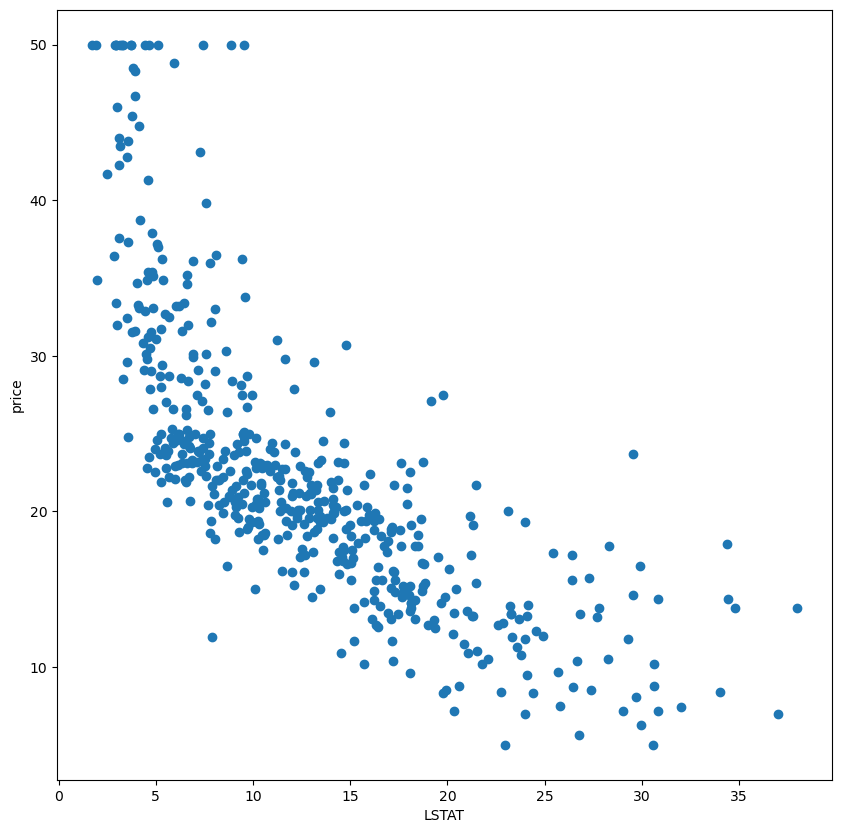

In [40]:
plt.figure(figsize =(10,10))
plt.scatter(x = x1, y = y,marker = 'o')
plt.xlabel('LSTAT')
plt.ylabel('price')
plt.show()

In [41]:
## Creating the Model
## MODEL EQUATION = Y = mX + c
## In our case X is a 2 dimensional vector of 2 input features
## Thus our equations changes to Y = m1X1 + m2X2 + c
## Thus we need to find the value of 3 parameters m1,m2 and c
## For our LOSS FUNCTION we will use mean squared error -> 1/n * sum(Y_pred - Y)^2
## n = length of dataset, Y_pred is prediction and Y is actual values
## Gradeint Descent fromula = 
                            # For any parameter K
                            # K' = K - L * derivative(Loss) here L = learning rate
            
## SO, GDF for parameter  m1' = m1 - L* (-2/n * m1 * (Y_pred - Y))
## GDF for parameter m2' = m2 - L * (-2/n * m2 * (Y_pred - Y))
## GDF for parameter C' = C - L * (-2/n * (Y_pred - Y))

In [104]:
## First we will run the model with only one parameter for better understading 

m1 = 0
c =  0
error = []
epochs = 1000 # Number of iterations
L = 0.0001 ## Learning Rate

n = len(x1)

for i in range(epochs):
    error_c = 0
    #GD_N = derivative value 
    # for m1 GD_m1 = -2 / n (Y_pred - Y) * m1
    # for c  GD_C = -2 / n (Y_pred - Y)
    cost_m1 = 0
    cost_c = 0

    for j in range(len(x1)):
        pd_m1  = (-2/n * x1[j]) * (y[j] - (m1 * x1[j] + c))
        pd_c = (-2/n) * (y[j] - (m1 * x1[j] + c))
        error_c = error_c + ( (y[j] - (m1 * x1[j] + c )**2) / n)
        cost_m1 = cost_m1 + pd_m1
        cost_c = cost_c + pd_c
    error.append(error_c)
    m1 =  m1 - L * cost_m1
    c = c - L * cost_c

print(f'm1 =  {m1}, C = {c}')

m1 =  1.0232547046169487, C = 1.6858300182834844


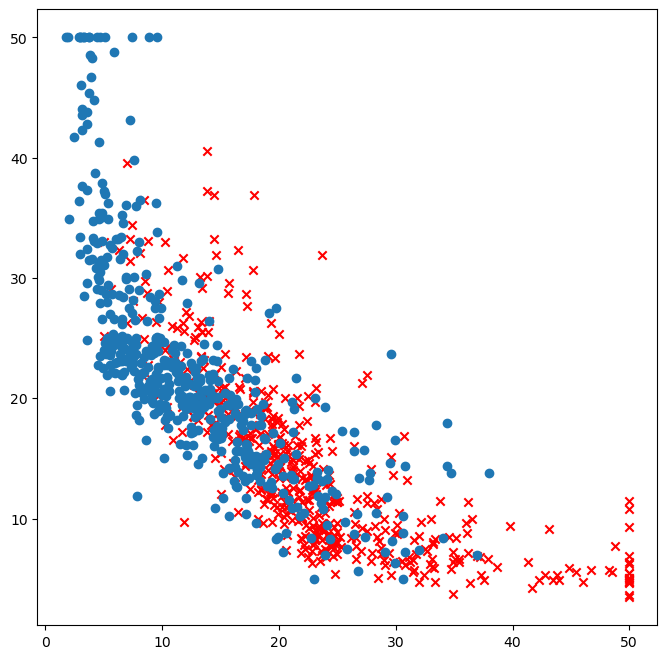

In [105]:
y_pred = m1 * x1  + c
plt.figure(figsize=(8,8))
plt.scatter(y,y_pred,marker = 'x',color = 'red')
plt.scatter(x = x1, y = y)
plt.show()

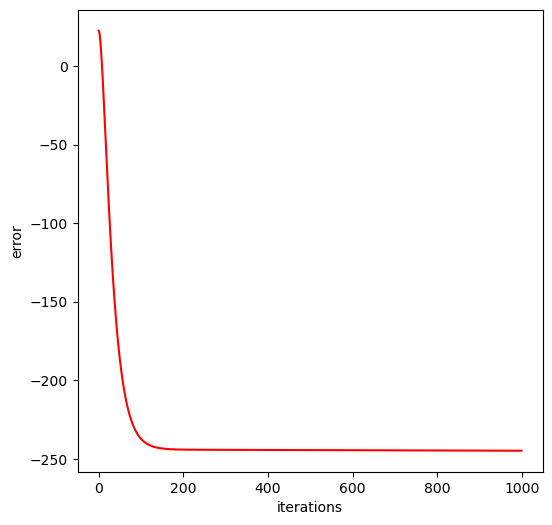

In [106]:
plt.figure(figsize = (6,6))
plt.plot(error,color='red')
plt.xlabel('iterations')
plt.ylabel('error')
plt.show()

In [103]:
error[len(error) - 1]

-244.88319538129537